In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)

In [10]:
# Find columns and data types in Measurement table
measurement = engine.execute('select * from Measurement')

print('Measurement table columns:')
print(measurement.keys())

m_columns = inspector.get_columns('Measurement')
for c in m_columns:
    print(c['name'], c['type'])

Measurement table columns:
['id', 'station', 'date', 'prcp', 'tobs']
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Find columns and data types in Station table
station = engine.execute('select * from Station')

print('Station table columns:')
print(station.keys())

s_columns = inspector.get_columns('Station')
for c in s_columns:
    print(c['name'], c['type'])

Station table columns:
['id', 'station', 'name', 'latitude', 'longitude', 'elevation']
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
max_date

('2017-08-23')

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
min_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
min_date

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
# Output data grouped by date and retrieves maximum precipitation measurement from each date
prcp_groupby_date = session.query(Measurement.date, func.max(Measurement.prcp))\
                           .filter(func.strftime('%Y-%m-%d', Measurement.date) >= min_date)\
                           .group_by(Measurement.date)\
                           .all()
prcp_groupby_date

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_groupby_date_df = pd.DataFrame(prcp_groupby_date, columns=['Date', 'Precipitation']).sort_values('Date')
prcp_groupby_date_df.set_index('Date', inplace=True)
prcp_groupby_date_df

,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


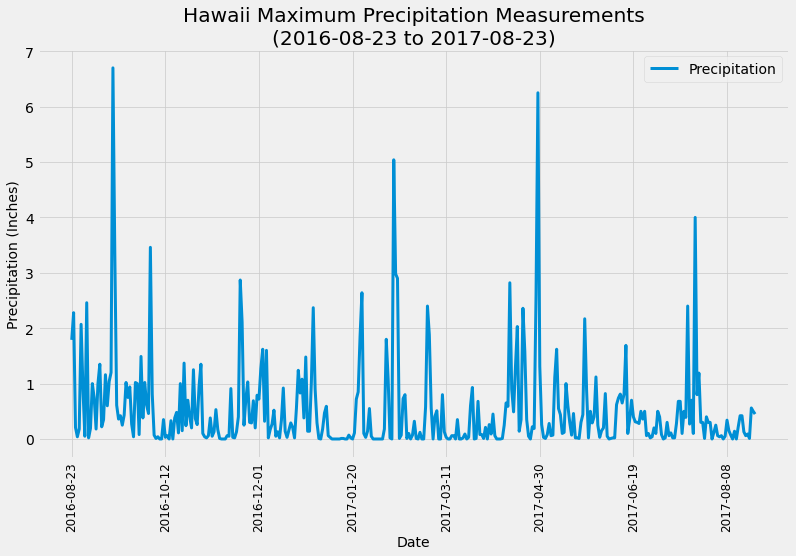

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
title = (f'Hawaii Maximum Precipitation Measurements\n({min_date} to 2017-08-23)')

plt.rcParams['figure.figsize']=(12,7)
prcp_groupby_date_df.plot(lw=3, zorder=3, rot=90)

plt.title(title)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precipitation (Inches)', fontsize=14)

plt.grid(zorder=0, alpha=0.75)
plt.xticks(fontsize=12)
plt.legend(loc='best')

plt.savefig('Images/precipitation_plot.png', bbox_inches='tight')

plt.show()

# Output plot groups data by date and plots maximum precipitation measurement from each date

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Need ungrouped data for summary statistics
prcp_all_data = session.query(Measurement.date, Measurement.prcp)\
                       .filter(func.strftime('%Y-%m-%d', Measurement.date) >= min_date)\
                       .all()

prcp_df = pd.DataFrame(prcp_all_data, columns=['Date', 'Precipitation']).dropna()
prcp_df.set_index('Date', inplace=True)
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
stations_total = session.query(Station).count()
print(f'Total number of stations in dataset: {stations_total}')

Total number of stations in dataset: 9


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations_activity = session.query(Measurement.station, func.count(Measurement.station))\
                           .group_by(Measurement.station)\
                           .order_by(func.count(Measurement.station).desc())\
                           .all()
stations_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
most_active_station = stations_activity[0]
# most_active_station

most_active_detail = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation)\
                            .filter(Station.station==(most_active_station[0]))\
                            .all()
most_active_detail

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

most_active = session.query(*sel).filter(Measurement.station==(most_active_station[0])).all()
# most_active

most_active_temps_df = pd.DataFrame(most_active, columns=['station', 'lowest_temp', 'highest_temp', 'average_temp'])
most_active_temps_df.set_index('station', inplace=True)
most_active_temps_df

,lowest_temp,highest_temp,average_temp
station,,,
USC00519281,54.0,85.0,71.663781


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_year_data = session.query(Measurement.date, Measurement.tobs)\
                               .filter(func.strftime('%Y-%m-%d', Measurement.date) >= min_date)\
                               .filter(Measurement.station==most_active_station[0])\
                               .all()
most_active_year_data

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [23]:
most_active_year_df = pd.DataFrame(most_active_year_data)
most_active_year_df.set_index('date', inplace=True)
most_active_year_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


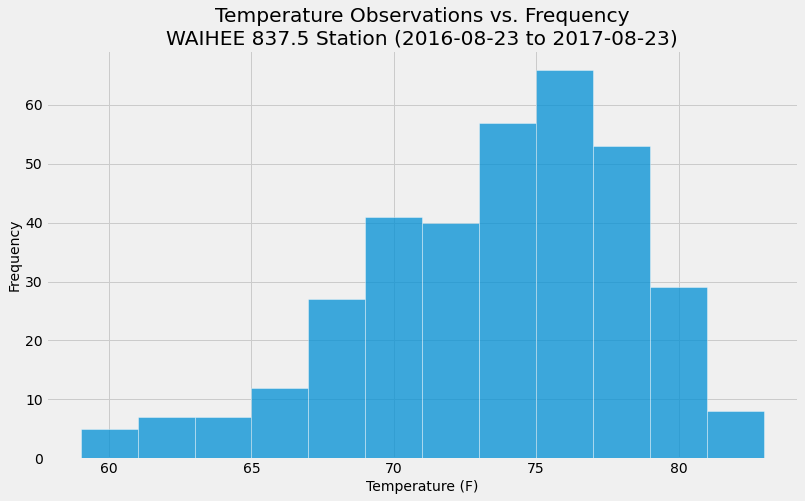

In [24]:
title = (f'Temperature Observations vs. Frequency\nWAIHEE 837.5 Station ({min_date} to 2017-08-23)')

plt.rcParams['figure.figsize']=(12,7)
plt.hist(most_active_year_df['tobs'], bins=12, edgecolor='white', alpha=0.75, zorder=3)

plt.title(title)
plt.xlabel('Temperature (F)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(zorder=0, alpha=1)

plt.savefig('Images/temp_observation_histogram.png', bbox_inches='tight')

plt.show()

# Close session

In [25]:
# Close Session
session.close()